In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [5]:
list(Y).count(0), list(Y).count(1)

(500, 268)

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
balancer = SMOTE()
x, y = balancer.fit_resample(X, Y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [44]:
lam = tf.keras.regularizers.l2(l=0)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=8, activation="sigmoid", kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [45]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
class_weights = {
    0 : 1,
    1 : 1
}

In [47]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, shuffle=True, class_weight=class_weights)

Epoch 1/50
40/40 [==============================] - 1s 10ms/step - loss: 0.7284 - accuracy: 0.4717 - val_loss: 0.6980 - val_accuracy: 0.5429
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.6083 - val_loss: 0.6684 - val_accuracy: 0.6429
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6330 - val_loss: 0.6471 - val_accuracy: 0.6714
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 0.6057 - accuracy: 0.7013 - val_loss: 0.6316 - val_accuracy: 0.6286
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.6685 - val_loss: 0.6174 - val_accuracy: 0.6571
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5872 - accuracy: 0.7078 - val_loss: 0.6071 - val_accuracy: 0.6429
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5423 - accuracy: 0.7351 - val_loss: 0.5980 - val_accuracy: 0.6857
Epoch 8/50
40/40 [=

In [48]:
y_pred = model.predict(X_test)

In [49]:
pred = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred, y_test)
print('Accuracy is:', a*100)

Accuracy is: 77.0


<AxesSubplot:>

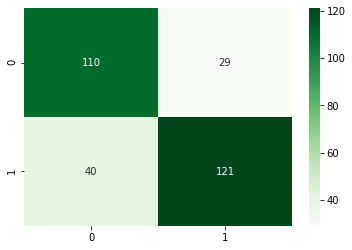

In [51]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='g', cmap='Greens')

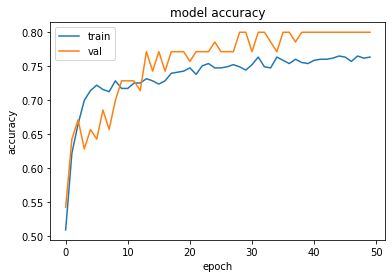

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

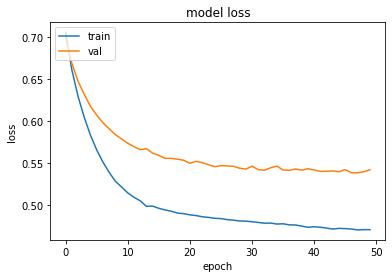

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()